<a href="https://colab.research.google.com/github/Adrian-Muino/DMML2022_Geneva/blob/main/Code/2.DMML_2022_Geneva_Improved_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Introduction

## Group project for Data Mining & Machine Learning course, at HEC UNIL 2022 (Geneva Group)
This notebook is the second step we took on our journey for the competition in kaggle
[Detecting the difficulty level of French texts](https://www.kaggle.com/competitions/detecting-french-texts-difficulty-level-2022).

You can find all our work in the following [GitHub](https://github.com/Adrian-Muino/DMML2022_Geneva).

In this notebook, we will try many differents classification models, including the ones that were mandatory, but this time with some data manipulation using two different natural language processing (NLP) library : Spacy and NLTK.


<br/>**At this stage we setted our first submission in the competition achieving an accuracy of 0.4725 using the SGD classifier with NLTK NLP**


##Table of content

>[A. Introduction](#scrollTo=Qlb7vJUtPiN7)

>>[Group project for Data Mining & Machine Learning course, at HEC UNIL 2022 (Geneva Group)](#scrollTo=s8ZM9vz6AOcx)

>>[Table of content](#scrollTo=NM4cHMyWzUeT)

>[B. Prerequisites](#scrollTo=XYaduem1EpPn)

>>[Installations](#scrollTo=pTjtXYKLQszM)

>>[Imports](#scrollTo=xBLCHLRyCeGs)

>[C. Environment set up & exploratory data analysis](#scrollTo=SaJyDpDGDOSH)

>>[Loading the data](#scrollTo=IekpHyvqEc2I)

>>[Data tables](#scrollTo=rSSUB_4yFULp)

>>[Baseline](#scrollTo=ldcy7ElvVSR1)

>[D. Tokenizer & vectorizer (using two different natural language toolkits)](#scrollTo=KzN8xnVIH7_x)

>>[Spacy](#scrollTo=ecy6xgFrV31s)

>>[NLTK](#scrollTo=7H_nhJnqV7ET)

>>[Quick comparison](#scrollTo=TSgMJcPsJkaS)

>[E. Classification models using the two different natural language tools (SPACY & NLTK)](#scrollTo=eFMo5IenItmy)

>>[Logistic Regression](#scrollTo=emUVPfdlU_SE)

>>>[With Spacy](#scrollTo=pueSQ8rlYosB)

>>>[With NLTK](#scrollTo=dQpT9TzUZ64X)

>>[kNN](#scrollTo=C6Fs620Nd3SU)

>>>[With Spacy](#scrollTo=dhR4y8HleKHr)

>>>[With NLTK](#scrollTo=5b6ImOiulMPV)

>>[Decision Tree](#scrollTo=renriEfumKb8)

>>>>[With Spacy](#scrollTo=itR2d-KYmXDn)

>>>>[With NLTK](#scrollTo=5Oxo9FQdm-yt)

>>[Random Forest](#scrollTo=2HS9KVtTn96m)

>>>>[With Spacy](#scrollTo=68VACqGYpZlX)

>>>>[With NLTK](#scrollTo=fPRNJKfephSr)

>>[Ridge classifier](#scrollTo=Z4oga3zwqhN_)

>>>>[With Spacy](#scrollTo=mpqEOZVcrTp2)

>>>>[With NLTK](#scrollTo=lGZSlO0arfgN)

>>[Perceptron classifier](#scrollTo=qqjAMiqNsC1k)

>>>>[With Spacy](#scrollTo=_Zkc2GXSs8nG)

>>>>[With NLTK](#scrollTo=euLYn4nftBdG)

>>[GradientBoostingClassifier](#scrollTo=yu-MvkWV_l78)

>>>>[With Spacy](#scrollTo=St-SKAcf_rhS)

>>>>[With NLTK](#scrollTo=BLf2Bf0RAQcf)

>>[XGB classifier](#scrollTo=q_9u9DjUEpNS)

>>>>[With Spacy](#scrollTo=l7ok-EGsEtLi)

>>>>[With NLTK](#scrollTo=GDPL0w9gEvZ6)

>>[SGD Classifier](#scrollTo=A8kq3naOGMha)

>>>>[With spacy](#scrollTo=jbx_t0fdGPcJ)

>>>>[With NLTK](#scrollTo=4JXemBQBGZFU)

>[F. Models Comparison](#scrollTo=XBVSdj5Btk-N)

>[G. Some outcomes](#scrollTo=rAdCMFVIyKpf)

>>>[First Submission (Real accuracy = 0.46166)](#scrollTo=_L406M1cGfnK)

>>>[Second Submission (Real accuracy = 0.4725)](#scrollTo=Tjt9Ru5-GkXU)

>>>[Third Submission (Real accuracy = 0.45666)](#scrollTo=sJ_A3S6mR3SZ)



#B. Prerequisites

##Installations

In [1]:
#Installation
!pip install sentence-transformers
!python -m spacy download fr_core_news_sm
!python -m spacy link fr_core_news_sm fr
!python -m spacy download fr_core_news_md
!pip install tensorflow_hub
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 5.8 MB 11.7 MB/s 
     |████████████████████████████████| 1.3 MB 67.5 MB/s 
     |████████████████████████████████| 182 kB 67.7 MB/s 
     |████████████████████████████████| 7.6 MB 59.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c14cee6949f46685ff3aa6d3edf2766d7d7596baeb807690147ee658ff961a85
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-22 12:45:49.178858: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capabl

## Imports

In [2]:
# Imports the functions we use all along our projects that are in python file in our GitHub
import requests
url = 'https://raw.githubusercontent.com/Adrian-Muino/DMML2022_Geneva/main/Code/dmml_2022_geneva_functions.py'

r = requests.get(url)

with open('dmml_2022_geneva_functions.py', 'w') as f:
    f.write(r.text)

In [3]:
# All the other imports
import string
import re

from dmml_2022_geneva_functions import *
import pandas as pd

import spacy
from spacy import displacy

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
nltk.download('punkt')

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from collections import Counter
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, Perceptron
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#C. Environment set up & exploratory data analysis

##Loading the data

In [4]:
# load the data from our github repository
training_data = 'https://raw.githubusercontent.com/Adrian-Muino/DMML2022_Geneva/main/Data/training_data.csv'
unlabelled_data = 'https://raw.githubusercontent.com/Adrian-Muino/DMML2022_Geneva/main/Data/unlabelled_test_data.csv'

df = df_train = pd.read_csv(training_data)
df_unlabeled = df_test = pd.read_csv(unlabelled_data)

##Data tables

In [5]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [6]:
df_unlabeled.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


In [7]:
# How many sentences there are for each category
df_train['difficulty'].value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

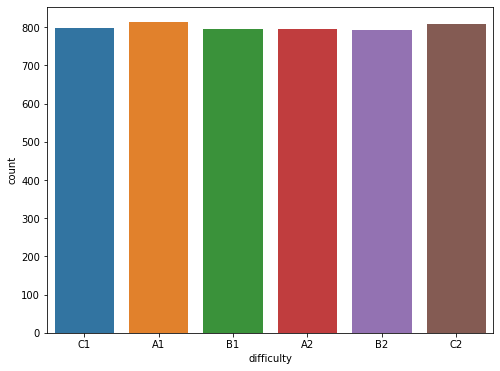

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_train.difficulty)
plt.show()

##Baseline

In [9]:
# Base line calculation
difficulty_A1_count = df.loc[df["difficulty"] == "A1"].shape[0]
difficulty_A2_count = df.loc[df["difficulty"] == "A2"].shape[0]
difficulty_B1_count = df.loc[df["difficulty"] == "B1"].shape[0]
difficulty_B2_count = df.loc[df["difficulty"] == "B2"].shape[0]
difficulty_C1_count = df.loc[df["difficulty"] == "C1"].shape[0]
difficulty_C2_count = df.loc[df["difficulty"] == "C2"].shape[0]
baserate = max(difficulty_A1_count, difficulty_A2_count,difficulty_B1_count,difficulty_B2_count,difficulty_C1_count,difficulty_C2_count)/(df["difficulty"].shape[0])
print("Baserate = ", baserate)

Baserate =  0.169375


#D. Tokenizer & vectorizer (using two different natural language toolkits)

We decided to use TFIDF vectorizer to weight more the rare words. To our opinion, rare words can be revelevant to detect complexity.

##Spacy

Spacy (or spaCy) is a popular natural language processing (NLP) library that includes a tokenizer for dividing a piece of text into individual tokens (commonly referred to as words, although in NLP the term "token" is more general and can refer to any part of a piece of text).

The spaCy tokenizer works by first dividing the text into sentences, using a combination of rules and machine learning models trained on a large dataset. It then divides each sentence into tokens, again using a combination of rules and machine learning models.

One of the key features of the spaCy tokenizer is its ability to handle a wide range of languages and writing systems, including languages with complex grammar and vocabulary, such as German and French, and languages with non-Latin scripts, such as Arabic and Chinese. The tokenizer is also able to handle a variety of text types, including social media posts, news articles, and academic papers.

Once the text has been tokenized, spaCy performs a number of additional NLP tasks, including part-of-speech tagging, named entity recognition, and dependency parsing. These tasks are used to extract structured information from the text and make it easier to analyze and manipulate.

For our competition, we will use the trained pipeline that already exists in french called : fr_core_news_sm

More information about the NLP is available in their
[website](https://spacy.io/) and you can find more details about the pipeline we use [here](https://spacy.io/models/fr).


Example of tokenization

In [10]:
# Create tokenizer function
sp_sm = spacy.load('fr_core_news_sm')

print(spacy_tokenizer_sm(df.loc[2, 'sentence']))

['le', 'test', 'de', 'niveau', 'en', 'français', 'être', 'sur', 'le', 'site', 'internet', 'de', 'le', 'école', '.']


Declaring the tokenizer

In [11]:
tfidf_vector_spacy = TfidfVectorizer(tokenizer=spacy_tokenizer_sm)

Part-of-speech

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


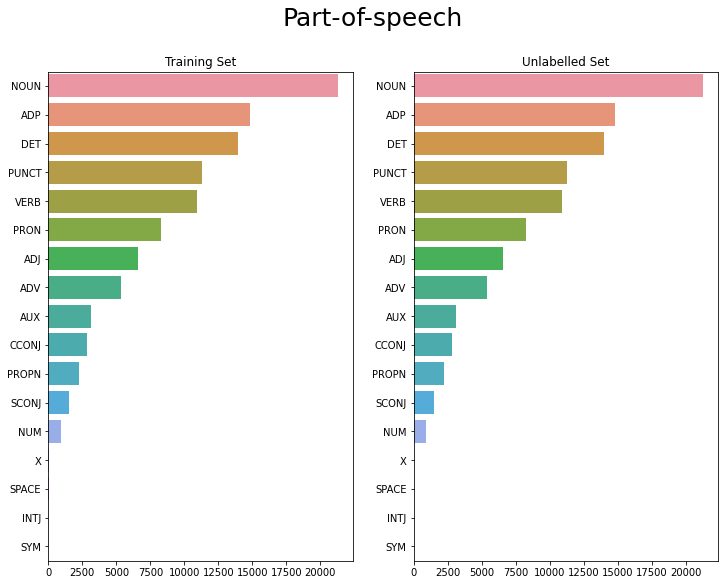

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12, 9))

c = Counter()
for sent in df_train.sentence:
    c += Counter([token.pos_ for token in sp_sm(sent)])

c = c.most_common()

c2 = Counter()
for sent in df_train.sentence:
    c2 += Counter([token.pos_ for token in sp_sm(sent)])

c2 = c2.most_common()

x = [i[1] for i in c]
y = [i[0] for i in c]

x2 = [i[1] for i in c2]
y2 = [i[0] for i in c2]

fig.suptitle("Part-of-speech", size=25)
ax[0].set_title("Training Set")
ax[1].set_title("Unlabelled Set")

sns.barplot(x, y, orient='h', ax=ax[1])
sns.barplot(x2, y2, orient='h', ax=ax[0])

##NLTK

The Natural Language Toolkit (NLTK) is a suite of libraries and resources for natural language processing (NLP) in the Python programming language. It provides tools for tasks such as tokenization (dividing text into individual words and punctuation), part-of-speech tagging (identifying the part of speech of each word), and named entity recognition (identifying named entities like person names, organizations, and locations).

NLTK also includes a number of resources and datasets for working with text, including a large collection of sample texts, word lists, and corpora (large collections of text). It also includes tools for working with other languages and writing systems, such as stemmers for reducing words to their base form and tools for working with machine translation.

More information about the NLTK NLP is available in their [website](https://www.nltk.org/) and the [github](https://github.com/nltk/nltk) from _Bird, Steven, Edward Loper and Ewan Klein (2009). Natural Language Processing with Python.  O'Reilly Media Inc._

Example of tokenization

In [13]:
print(nltk_tokenizer(df.loc[2, 'sentence']))

['le', 'test', 'de', 'niveau', 'en', 'français', 'est', 'sur', 'le', 'site', 'internet', 'de', "l'école", '.']


Declaring the tokenizer

In [14]:
tfidf_vector_nltk = TfidfVectorizer(tokenizer=nltk_tokenizer)

##Quick comparison

Looking at the output of each NLP we can see there are slight differences :<br/>


*   print(spacy_tokenizer_sm(df.loc[2, 'sentence']))
<br/> **['le', 'test', 'de', 'niveau', 'en', 'français', <mark>'être'</mark>, 'sur', 'le', 'site', 'internet', 'de', <mark>''le''</mark>, <mark>''école'</mark>', '.']**<br/><br/>

*   print(nltk_tokenizer(df.loc[2, 'sentence']))
<br/> **['le', 'test', 'de', 'niveau', 'en', 'français', <mark>''est'</mark>', 'sur', 'le', 'site', 'internet', 'de', <mark>'"l'école"</mark>', '.']**






# E. Classification models using the two different natural language tools (SPACY & NLTK)

In [15]:
X = df["sentence"] # the features we want to analyze
y = df["difficulty"] # the labels we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train

70                                Comment t'appelles-tu ?
4347    Voilà qui serait en effet de nature à simplifi...
1122    Les pèlerins partagèrent alors cette célébrati...
4570                          Qu'est-ce que vous faites ?
34      En voici un des moins obscurs : "Plus nous dev...
                              ...                        
1033    Les micro-changements apportés par ce type d'u...
3264    J'allais à la poste quand j'ai croisé ma cousi...
1653    Au cours des années 1970 et 1980, plusieurs gr...
2607    Stop : tout d'abord, figurez-vous que les vrai...
2732    "On s'est alors dit que le terrain commençait ...
Name: sentence, Length: 3840, dtype: object

##Logistic Regression

###With Spacy

In [16]:
# Define classifier
LR_spacy_model= LogisticRegression(solver = "lbfgs", multi_class = 'multinomial')

# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
LR_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy), ('classifier', LR_spacy_model)])

# Fit model on training set
LR_spacy_pipe.fit(X_train, y_train)

LR_spacy_pred = LR_spacy_pipe.predict(X_test)

LR_spacy_report = evaluate(y_test, LR_spacy_pred)

# Storing the model performance results in a DF called reports
reports['Logistic Regression Spacy'] = LR_spacy_report

LR_spacy_report

{'accuracy': 0.47708333333333336,
 'recall': 0.4776555731965663,
 'precision': 0.47618103606302115,
 'f1_score': 0.4747294688325296}

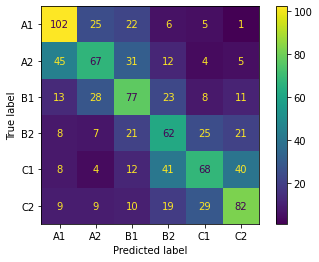

In [17]:
plot_confusion_matrix(y_test, LR_spacy_pred, LR_spacy_pipe)

Example of type of errors

In [18]:
badly_predicted = pd.DataFrame({'sentence':X_test[LR_spacy_pred != y_test],
              'predicted':LR_spacy_pred[LR_spacy_pred != y_test],
              'true':y_test[LR_spacy_pred != y_test]})


for i, row in badly_predicted.sample(3).iterrows():
    print(row.sentence)
    print(f"Predicted: {row.predicted}")
    print(f"Actual: {row.true}")

Le réseau social annonce ce mardi la constitution d'un "comité consultatif européen de sécurité", composé de neuf membres de la société civile.
Predicted: C1
Actual: B2
À 40 ans, il est usé.
Predicted: A1
Actual: B1
Il y a beaucoup de désordre dans l'appartement.
Predicted: A2
Actual: A1


###With NLTK

NLTK == Natural Language Toolkit

In [19]:
# Define classifier
LR_model_nltk = LogisticRegression(solver = "lbfgs", multi_class = 'multinomial')

# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
LR_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk), ('classifier', LR_model_nltk)])

# Fit model on training set
LR_nltk_pipe.fit(X_train, y_train)

LR_nltk_pred = LR_nltk_pipe.predict(X_test)

LR_nltk_report = evaluate(y_test, LR_nltk_pred)

# Storing the model performance results in a DF called reports
reports['Logistic Regression NLTK'] = LR_nltk_report

LR_nltk_report

{'accuracy': 0.4864583333333333,
 'recall': 0.48852107075520407,
 'precision': 0.48299665579640344,
 'f1_score': 0.4820740600661711}

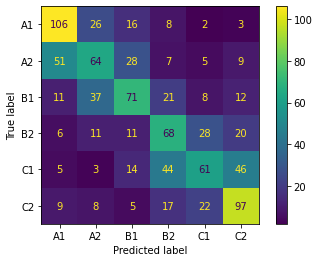

In [20]:
plot_confusion_matrix(y_test, LR_nltk_pred, LR_nltk_pipe)

Example of type of errors

In [21]:
badly_predicted = pd.DataFrame({'sentence':X_test[LR_nltk_pred != y_test],
              'predicted':LR_nltk_pred[LR_nltk_pred != y_test],
              'true':y_test[LR_nltk_pred != y_test]})


for i, row in badly_predicted.sample(3).iterrows():
    print(row.sentence)
    print(f"Predicted: {row.predicted}")
    print(f"Actual: {row.true}")

Après, je vais dans la cuisine et je bois mon café
Predicted: A2
Actual: A1
La dynamique de la vie de ces couples, ponctuée par des crises successives et des étapes semblables à celles de n'importe quel couple, a pourtant sa logique propre.
Predicted: C1
Actual: C2
Les articulations sont en haut la hanche, au milieu le genou en en bas la cheville
Predicted: C1
Actual: B1


##kNN

###With Spacy

In [22]:
# Define classifier
knn_spacy_model = KNeighborsClassifier()
Nknn = list(range(1, 100))
param_grid = dict(n_neighbors=Nknn)

# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

knn_spacy_grid = GridSearchCV(knn_spacy_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

knn_spacy_pipe = Pipeline([('vectorizer',  tfidf_vector_spacy), ('classifier', knn_spacy_grid)])
# Fit model on training set
knn_spacy_pipe.fit(X_train, y_train)

best_param_knn_spacy = knn_spacy_grid .best_params_.get('n_neighbors')
print(knn_spacy_grid .best_params_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
{'n_neighbors': 12}


In [23]:
knn_spacy_classifier = KNeighborsClassifier(n_neighbors=best_param_knn_spacy)
# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
KNN_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy), ('classifier', knn_spacy_classifier)])

# Fit model on training set
KNN_spacy_pipe.fit(X_train, y_train)

# Predictions
KNN_spacy_pred = KNN_spacy_pipe.predict(X_test)

KNN_spacy_pred_report = evaluate(y_test, KNN_spacy_pred)

# Storing the model performance results in a DF called reports
reports['KNN Spacy'] = KNN_spacy_pred_report

KNN_spacy_pred_report

{'accuracy': 0.33958333333333335,
 'recall': 0.3390992681026839,
 'precision': 0.3878947666751313,
 'f1_score': 0.31931761937572006}

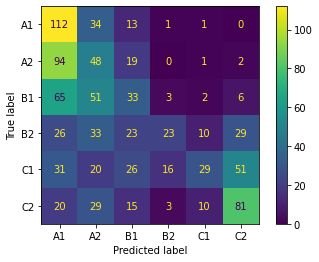

In [24]:
plot_confusion_matrix(y_test, KNN_spacy_pred, KNN_spacy_pipe)

###With NLTK

In [25]:
# Define classifier
knn_nltk_model = KNeighborsClassifier()
Nknn = list(range(1, 100))
param_grid = dict(n_neighbors=Nknn)

# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

knn_nltk_grid = GridSearchCV(knn_nltk_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

knn_nltk_pipe = Pipeline([('vectorizer',  tfidf_vector_nltk), ('classifier', knn_nltk_grid)])
# Fit model on training set
knn_nltk_pipe.fit(X_train, y_train)

best_param_knn_nltk = knn_nltk_grid .best_params_.get('n_neighbors')
print(knn_nltk_grid .best_params_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
{'n_neighbors': 36}


In [26]:
knn_nltk_classifier = KNeighborsClassifier(n_neighbors=best_param_knn_nltk)
# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
KNN_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk), ('classifier', knn_nltk_classifier)])

# Fit model on training set
KNN_nltk_pipe.fit(X_train, y_train)

# Predictions
KNN_nltk_pred = KNN_nltk_pipe.predict(X_test)

KNN_nltk_pred_report = evaluate(y_test, KNN_nltk_pred)

# Storing the model performance results in a DF called reports
reports['KNN NLTK'] = KNN_nltk_pred_report

KNN_nltk_pred_report

{'accuracy': 0.3572916666666667,
 'recall': 0.35709204798993505,
 'precision': 0.3793709754833736,
 'f1_score': 0.3255541547284067}

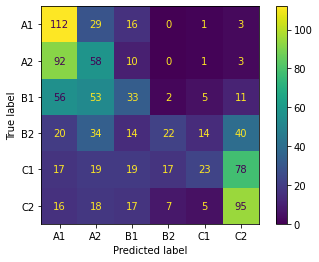

In [27]:
plot_confusion_matrix(y_test, KNN_nltk_pred, KNN_nltk_pipe)

##Decision Tree

####With Spacy

In [28]:
tree_spacy_model = DecisionTreeClassifier()

tree_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy),
                 ('classifier', tree_spacy_model)])


tree_spacy_pipe.fit(X_train, y_train)

tree_spacy_pred = tree_spacy_pipe.predict(X_test)

tree_spacy_report = evaluate(y_test, tree_spacy_pred)

# Store model performance results
reports['Decision Tree Spacy'] = tree_spacy_report

tree_spacy_report

{'accuracy': 0.34375,
 'recall': 0.3442394457397307,
 'precision': 0.34113116376110003,
 'f1_score': 0.34125788703968696}

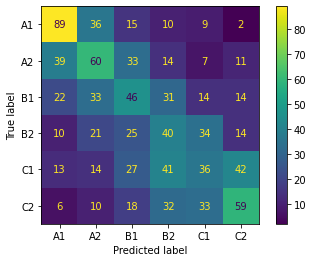

In [29]:
plot_confusion_matrix(y_test, tree_spacy_pred, tree_spacy_pipe)

####With NLTK

In [30]:
tree_nltk_model = DecisionTreeClassifier()

tree_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk),
                 ('classifier', tree_nltk_model)])


tree_nltk_pipe.fit(X_train, y_train)

tree_nltk_pred = tree_nltk_pipe.predict(X_test)

tree_nltk_report = evaluate(y_test, tree_nltk_pred)

# Store model performance results
reports['Decision Tree NLTK'] = tree_nltk_report

tree_nltk_report

{'accuracy': 0.30104166666666665,
 'recall': 0.30249052597314957,
 'precision': 0.30042939029783566,
 'f1_score': 0.29766569264845205}

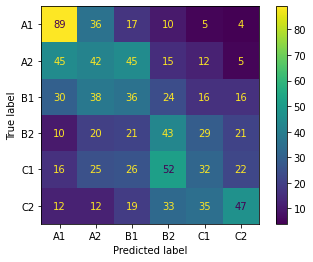

In [31]:
plot_confusion_matrix(y_test, tree_nltk_pred, tree_nltk_pipe)

##Random Forest

####With Spacy

In [32]:
forest_spacy_model = RandomForestClassifier()

forest_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy),
                 ('classifier', forest_spacy_model)])

forest_spacy_pipe.fit(X_train, y_train)

forest_spacy_pred = forest_spacy_pipe.predict(X_test)

forest_spacy_report = evaluate(y_test, forest_spacy_pred)

# Store model performance results
reports['Random Forest Spacy'] = forest_spacy_report

forest_spacy_report

{'accuracy': 0.4041666666666667,
 'recall': 0.4048496435699671,
 'precision': 0.406328163567175,
 'f1_score': 0.39489197934597325}

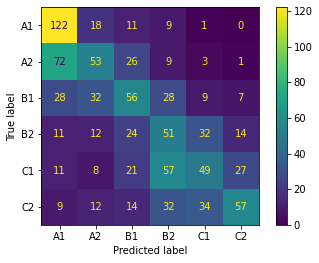

In [33]:
plot_confusion_matrix(y_test, forest_spacy_pred, forest_spacy_pipe)

####With NLTK

In [34]:
forest_nltk_model = RandomForestClassifier()

forest_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk),
                 ('classifier', forest_nltk_model)])

forest_nltk_pipe.fit(X_train, y_train)

forest_nltk_pred = forest_nltk_pipe.predict(X_test)

forest_nltk_report = evaluate(y_test, forest_nltk_pred)

# Store model performance results
reports['Random Forest NLTK'] = forest_nltk_report

forest_nltk_report

{'accuracy': 0.403125,
 'recall': 0.4058812820890086,
 'precision': 0.4076792134859777,
 'f1_score': 0.391922876500749}

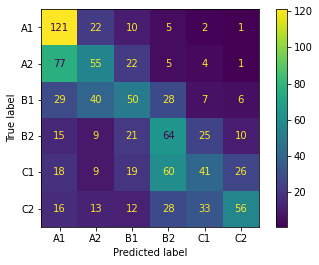

In [35]:
plot_confusion_matrix(y_test, forest_nltk_pred, forest_nltk_pipe)

##Ridge classifier

Ridge classifier is a type of linear classifier that is trained using Ridge regression, which is a variant of least squares linear regression that uses L2 regularization. Ridge regression adds a penalty term to the objective function that is being optimized, which helps to prevent overfitting and improve the generalization performance of the model.

####With Spacy

In [36]:
ridge_spacy_model = RidgeClassifier()

ridge_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy),
                             ('classifier', ridge_spacy_model)])

ridge_spacy_pipe.fit(X_train, y_train)

ridge_spacy_pred = ridge_spacy_pipe.predict(X_test)

ridge_spacy_report = evaluate(y_test, ridge_spacy_pred)

# Store model performance results
reports['Ridge Classifier Spacy'] = ridge_spacy_report

ridge_spacy_report

{'accuracy': 0.46458333333333335,
 'recall': 0.4647618612515534,
 'precision': 0.4659453701846607,
 'f1_score': 0.4619179523466987}

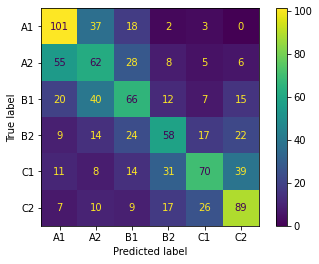

In [37]:
plot_confusion_matrix(y_test, ridge_spacy_pred, ridge_spacy_pipe)

####With NLTK

In [38]:
ridge_nltk_model = RidgeClassifier()

ridge_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk),
                             ('classifier', ridge_nltk_model)])

ridge_nltk_pipe.fit(X_train, y_train)

ridge_nltk_pred = ridge_nltk_pipe.predict(X_test)

ridge_nltk_report = evaluate(y_test, ridge_nltk_pred)

# Store model performance results
reports['Ridge Classifier NLTK'] = ridge_nltk_report

ridge_nltk_report

{'accuracy': 0.48854166666666665,
 'recall': 0.4896766905572185,
 'precision': 0.4874729561439978,
 'f1_score': 0.48364906264711555}

##Perceptron classifier

Perceptron classifier is a type of linear classifier that is used for binary classification. It is based on the perceptron algorithm, which is a simple algorithm that can be used to learn a linear decision boundary between two classes.

####With Spacy

In [39]:
perceptron_spacy_model = Perceptron()

perceptron_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy),
                 ('classifier', perceptron_spacy_model)])


perceptron_spacy_pipe.fit(X_train, y_train)

perceptron_spacy_pred = perceptron_spacy_pipe.predict(X_test)

perceptron_spacy_report = evaluate(y_test, perceptron_spacy_pred)

# Store model performance results
reports['Perceptron Classifier Spacy'] = perceptron_spacy_report

perceptron_spacy_report


{'accuracy': 0.41041666666666665,
 'recall': 0.41035209950055634,
 'precision': 0.419992178466476,
 'f1_score': 0.4117283025225354}

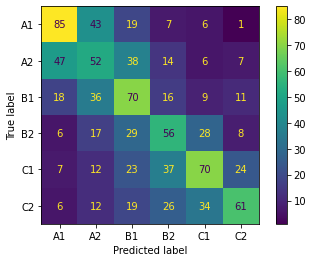

In [40]:
plot_confusion_matrix(y_test, perceptron_spacy_pred, perceptron_spacy_pipe)

####With NLTK

In [41]:
perceptron_nltk_model = Perceptron()

perceptron_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk),
                 ('classifier', perceptron_nltk_model)])


perceptron_nltk_pipe.fit(X_train, y_train)

perceptron_nltk_pred = perceptron_nltk_pipe.predict(X_test)

perceptron_nltk_report = evaluate(y_test, perceptron_nltk_pred)

# Store model performance results
reports['Perceptron Classifier NLTK'] = perceptron_nltk_report

perceptron_nltk_report


{'accuracy': 0.44583333333333336,
 'recall': 0.44498705396339355,
 'precision': 0.4463002013881355,
 'f1_score': 0.4445842616422033}

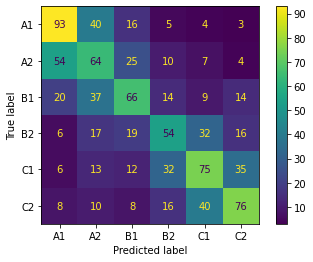

In [42]:
plot_confusion_matrix(y_test, perceptron_nltk_pred, perceptron_nltk_pipe)

##GradientBoostingClassifier

Gradient Boosting Classifier is a type of ensemble learning method that can be used for classification and regression tasks. It combines the predictions of multiple weak models, such as decision trees, to create a strong model that is able to make more accurate predictions.

####With Spacy

In [43]:
gbc_spacy_model = GradientBoostingClassifier()

gbc_spacy_pipe = Pipeline([('vectorizer',  tfidf_vector_spacy),
                 ('classifier', gbc_spacy_model)])

gbc_spacy_pipe.fit(X_train, y_train)

gbc_spacy_pred = gbc_spacy_pipe.predict(X_test)

gbc_spacy_report = evaluate(y_test, gbc_spacy_pred)

# Store model performance results
reports['Gradient Boosting Classifier Spacy'] = gbc_spacy_report

gbc_spacy_report


{'accuracy': 0.41770833333333335,
 'recall': 0.41816564007377705,
 'precision': 0.4169859247223647,
 'f1_score': 0.4139245335774424}

####With NLTK

In [44]:
gbc_nltk_model = GradientBoostingClassifier()

gbc_nltk_pipe = Pipeline([('vectorizer',  tfidf_vector_nltk),
                 ('classifier', gbc_nltk_model)])

gbc_nltk_pipe.fit(X_train, y_train)

gbc_nltk_pred = gbc_nltk_pipe.predict(X_test)

gbc_nltk_report = evaluate(y_test, gbc_nltk_pred)

# Store model performance results
reports['Gradient Boosting Classifier NLTK'] = gbc_nltk_report

gbc_nltk_report

{'accuracy': 0.421875,
 'recall': 0.42366256510112205,
 'precision': 0.4261056797670544,
 'f1_score': 0.41766784375434457}

##XGB classifier

XGBoost (Extreme Gradient Boosting) is an open-source implementation of the Gradient Boosting algorithm that was developed by Tianqi Chen. It is a popular choice for many machine learning tasks, including classification, because it is fast, scalable, and can achieve high performance on a wide range of datasets.

####With Spacy

In [45]:
from xgboost import XGBClassifier

xgb_spacy_model = XGBClassifier()
xgb_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy), ('classifier', xgb_spacy_model)])

xgb_spacy_pipe.fit(X_train, y_train)

xgb_spacy_pred = xgb_spacy_pipe.predict(X_test)

xgb_spacy_report = evaluate(y_test, xgb_spacy_pred)

# Store model performance results
reports['XGB Classifier Spacy'] = xgb_spacy_report

xgb_spacy_report

{'accuracy': 0.40729166666666666,
 'recall': 0.40737400249510963,
 'precision': 0.40633065314814026,
 'f1_score': 0.4004317790331446}

####With NLTK

In [46]:
xgb_nltk_model = XGBClassifier()
xgb_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk), ('classifier', xgb_nltk_model)])

xgb_nltk_pipe.fit(X_train, y_train)

xgb_nltk_pred = xgb_nltk_pipe.predict(X_test)

xgb_nltk_report = evaluate(y_test, xgb_nltk_pred)

# Store model performance results
reports['XGB Classifier NLTK'] = xgb_nltk_report 

xgb_nltk_report

{'accuracy': 0.39166666666666666,
 'recall': 0.3933612614746378,
 'precision': 0.3982022538874536,
 'f1_score': 0.38183735819807363}

##SGD Classifier

Stochastic Gradient Descent (SGD) Classifier is a type of linear classifier that is trained using the stochastic gradient descent optimization algorithm. It is a variant of the Perceptron algorithm, where the model is trained on small batches of data rather than the entire dataset.

####With spacy

In [47]:
from sklearn.linear_model import SGDClassifier

sgd_spacy_model = SGDClassifier()

sgd_spacy_pipe = Pipeline([('vectorizer', tfidf_vector_spacy), ('classifier', sgd_spacy_model)])

sgd_spacy_pipe.fit(X_train, y_train)

sgd_spacy_pred = sgd_spacy_pipe.predict(X_test)

sgd_spacy_report = evaluate(y_test, sgd_spacy_pred)

# Store model performance results
reports['SGD Classifier Spacy'] = sgd_spacy_report

sgd_spacy_report


{'accuracy': 0.46145833333333336,
 'recall': 0.46232680818220145,
 'precision': 0.4631978277966084,
 'f1_score': 0.4604971917104665}

####With NLTK

In [48]:
sgd_nltk_model = SGDClassifier()

sgd_nltk_pipe = Pipeline([('vectorizer', tfidf_vector_nltk), ('classifier', sgd_nltk_model)])

sgd_nltk_pipe.fit(X_train, y_train)

sgd_nltk_pred = sgd_nltk_pipe.predict(X_test)

sgd_nltk_report = evaluate(y_test, sgd_nltk_pred)

# Store model performance results
reports['SGD Classifier NLTK'] = sgd_nltk_report

sgd_nltk_report


{'accuracy': 0.46875,
 'recall': 0.4698720432373856,
 'precision': 0.4682247399082408,
 'f1_score': 0.46523304185083675}

#F. Models Comparison

The results are displayed in this section. We can see which models are more promising comparing them all. In the below graph and table, each model is displayed using both NPL.

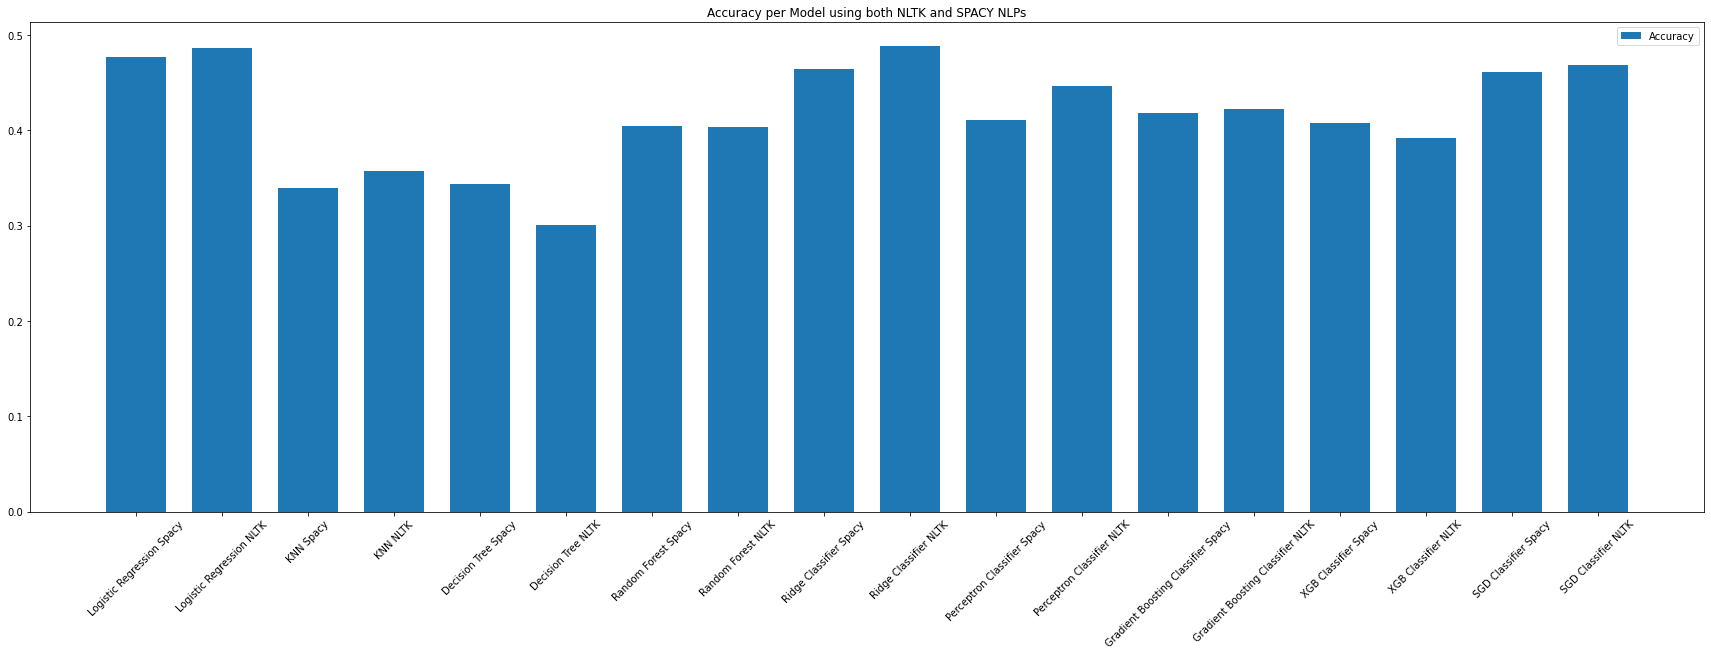

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(30,9))

width = 0.70
labels = reports.keys()
report_values_accuracy = [x['accuracy'] for x in reports.values()]

ax.bar(labels, report_values_accuracy, 
        label='Accuracy', width=width)

plt.xticks(rotation=45)
ax.legend()
plt.title("Accuracy per Model using both NLTK and SPACY NLPs")
plt.show()

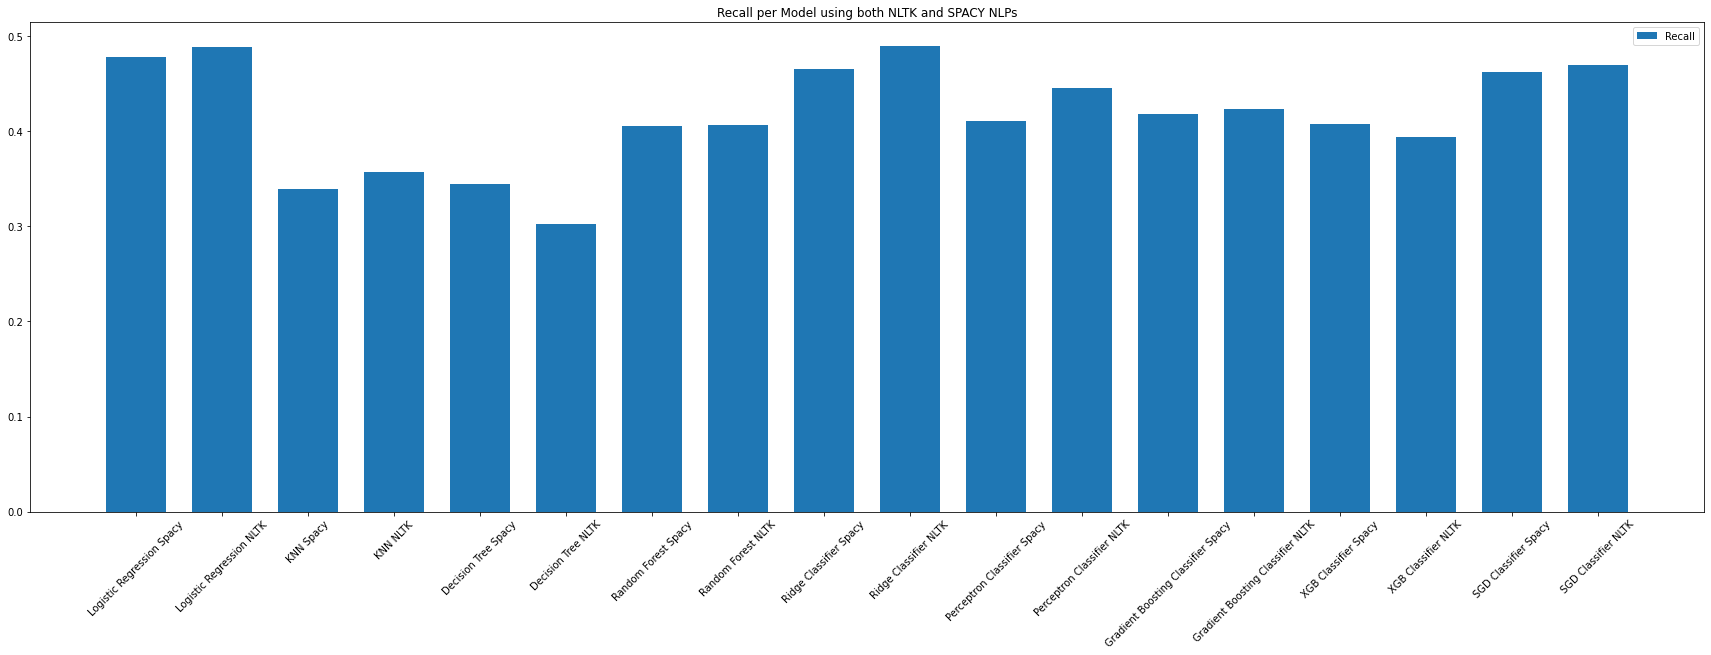

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(30,9))

width = 0.70
labels = reports.keys()
report_values_recall = [x['recall'] for x in reports.values()]

ax.bar(labels, report_values_recall, 
        label='Recall', width=width)

plt.xticks(rotation=45)
ax.legend()
plt.title("Recall per Model using both NLTK and SPACY NLPs")
plt.show()

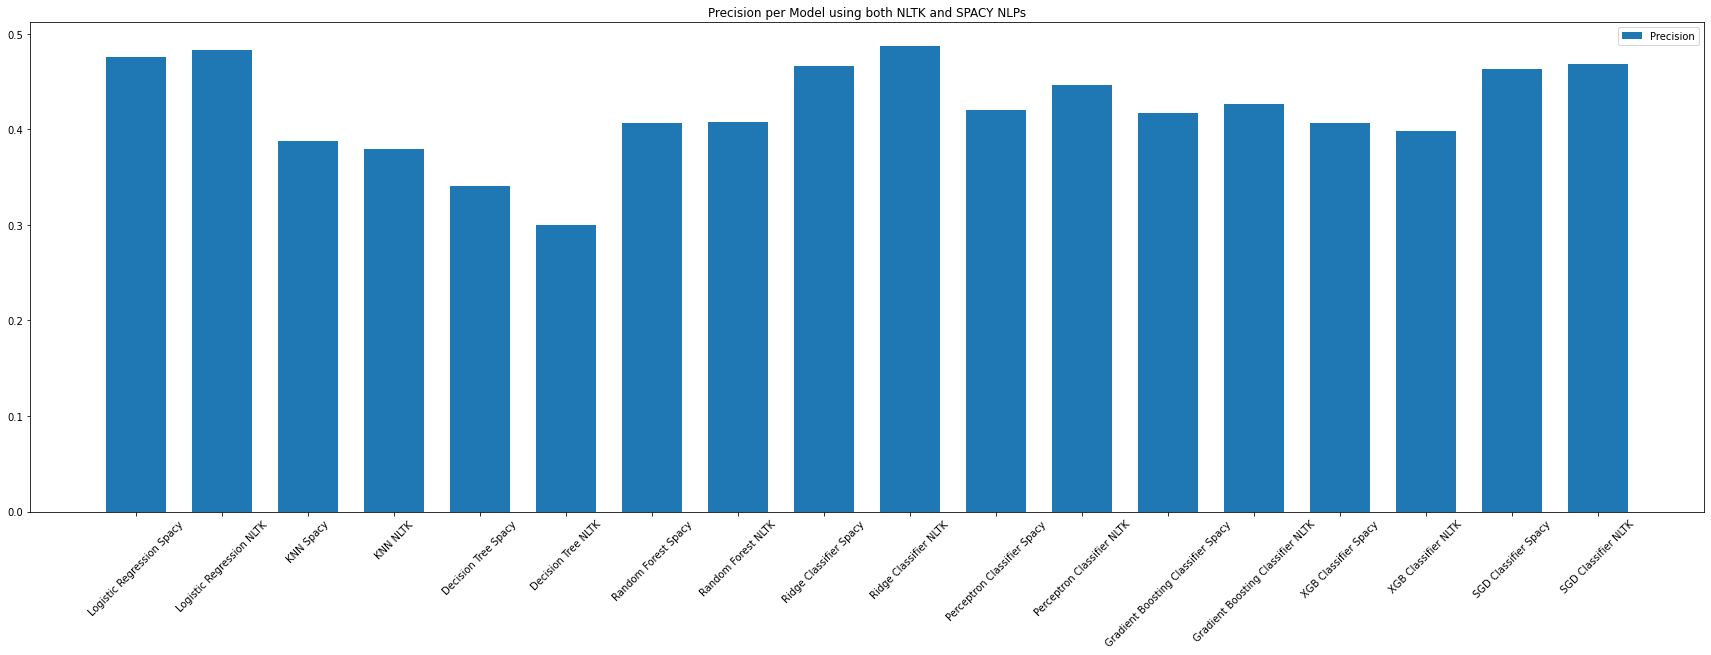

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(30,9))

width = 0.70
labels = reports.keys()
report_values_precision = [x['precision'] for x in reports.values()]

ax.bar(labels, report_values_precision, 
        label='Precision', width=width)

plt.xticks(rotation=45)
ax.legend()
plt.title("Precision per Model using both NLTK and SPACY NLPs")
plt.show()

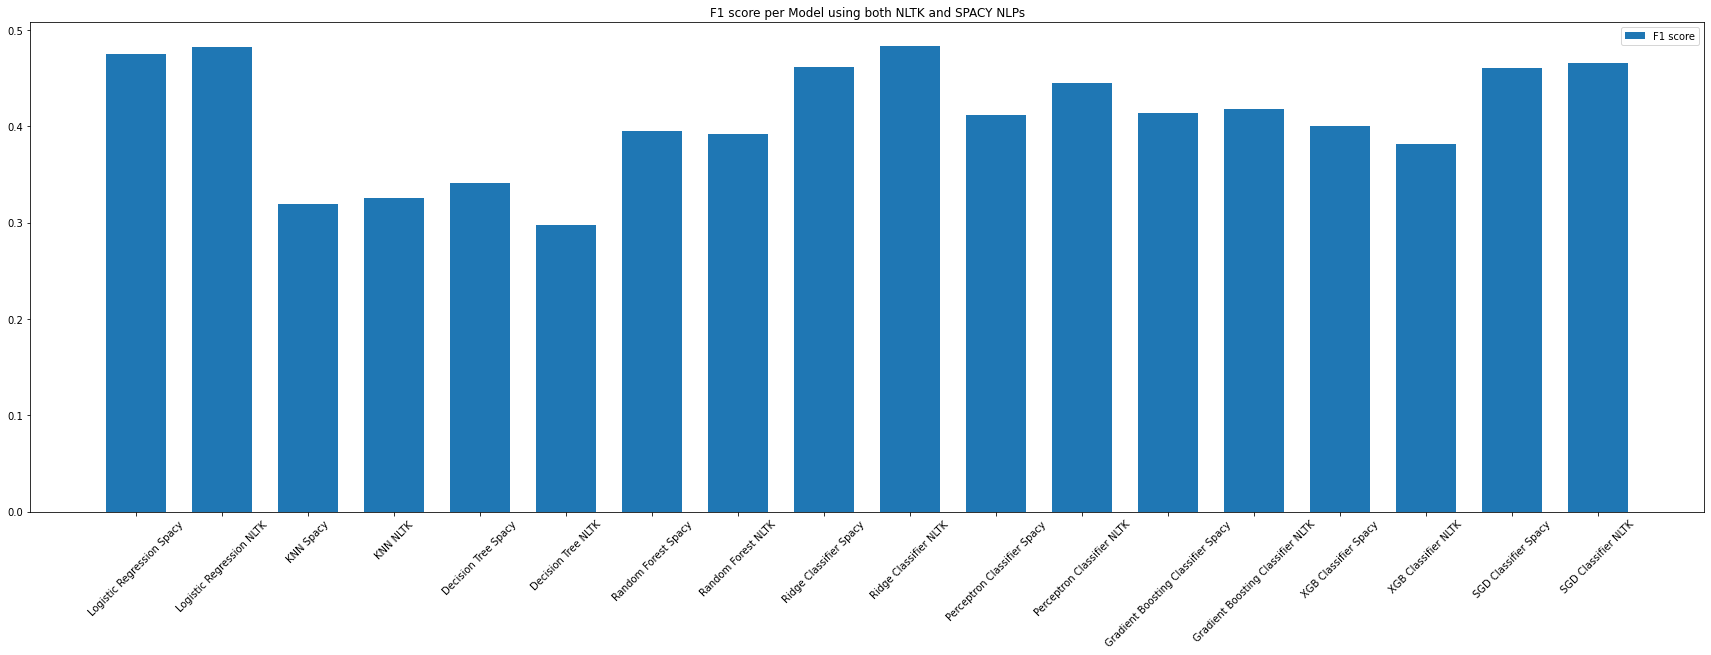

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(30,9))

width = 0.70
labels = reports.keys()
report_values_f1_score = [x['f1_score'] for x in reports.values()]

ax.bar(labels, report_values_f1_score, 
        label='F1 score', width=width)

plt.xticks(rotation=45)
ax.legend()
plt.title("F1 score per Model using both NLTK and SPACY NLPs")
plt.show()

In [75]:
models_comparaison_table2 = pd.DataFrame({'Model name':pd.Series(reports.keys()),'Accuracy':pd.Series(report_values_accuracy),'Recall':pd.Series(report_values_recall),'Precision':pd.Series(report_values_precision),'F1 Score':pd.Series(report_values_f1_score),}).sort_values(by=['Accuracy'],ascending=False)
models_comparaison_table2.set_index(['Model name']).T

Model name,Ridge Classifier NLTK,Logistic Regression NLTK,Logistic Regression Spacy,SGD Classifier NLTK,Ridge Classifier Spacy,SGD Classifier Spacy,Perceptron Classifier NLTK,Gradient Boosting Classifier NLTK,Gradient Boosting Classifier Spacy,Perceptron Classifier Spacy,XGB Classifier Spacy,Random Forest Spacy,Random Forest NLTK,XGB Classifier NLTK,KNN NLTK,Decision Tree Spacy,KNN Spacy,Decision Tree NLTK
Accuracy,0.488542,0.486458,0.477083,0.468750,0.464583,0.461458,0.445833,0.421875,0.417708,0.410417,0.407292,0.404167,0.403125,0.391667,0.357292,0.343750,0.339583,0.301042
Recall,0.489677,0.488521,0.477656,0.469872,0.464762,0.462327,0.444987,0.423663,0.418166,0.410352,0.407374,0.404850,0.405881,0.393361,0.357092,0.344239,0.339099,0.302491
Precision,0.487473,0.482997,0.476181,0.468225,0.465945,0.463198,0.446300,0.426106,0.416986,0.419992,0.406331,0.406328,0.407679,0.398202,0.379371,0.341131,0.387895,0.300429
F1 Score,0.483649,0.482074,0.474729,0.465233,0.461918,0.460497,0.444584,0.417668,0.413925,0.411728,0.400432,0.394892,0.391923,0.381837,0.325554,0.341258,0.319318,0.297666


# G. Some outcomes

Based on the results obtained above, we decided to make our first submissions with the following models :

*   Ridge Classifier using NLTK with a predicted accuracy of 0.488542 vs a real of 0.46166
*   SGD Classifier using NLTK with a predicted accuracy of 0.477083 vs a real of 0.4725
*   LR Classifier using NLTK with a predicted accuracy of 0.486458 vs a real of 0.45666

<br/><br/>**At this stage we setted our best submission in the competition achieving an accuracy of 0.4725 using the SGD classifier with NLTK NLP**

###First Submission (Real accuracy = 0.46166)

In [51]:
# Used the best model in terms of accuracy
geneva_predictions_ridge_nltk = ridge_nltk_pipe.predict(df_unlabeled["sentence"])

first_submission = pd.DataFrame(geneva_predictions_ridge_nltk,columns=["difficulty"])
first_submission = first_submission.rename_axis("id")

first_submission.to_csv("Geneva_predictions_ridge_nltk.csv") 

In [52]:
first_submission

,difficulty
id,
0,C2
1,B1
2,A1
3,A1
4,C2
...,...
1195,B1
1196,A2
1197,C2


###Second Submission (Real accuracy = 0.4725)

In [53]:
# Used the best model in terms of accuracy
geneva_predictions_sgd_nltk = sgd_nltk_pipe.predict(df_unlabeled["sentence"])

second_submission = pd.DataFrame(geneva_predictions_sgd_nltk ,columns=["difficulty"])
second_submission = second_submission.rename_axis("id")

second_submission.to_csv("Geneva_predictions_sgd_nltk.csv") 

In [54]:
second_submission

,difficulty
id,
0,C2
1,B1
2,A1
3,A1
4,C2
...,...
1195,B1
1196,A2
1197,C2


###Third Submission (Real accuracy = 0.45666)

In [55]:
# Used the best model in terms of accuracy
geneva_predictions_LR_nltk = LR_nltk_pipe.predict(df_unlabeled["sentence"])

third_submission = pd.DataFrame(geneva_predictions_LR_nltk ,columns=["difficulty"])
third_submission = third_submission.rename_axis("id")

third_submission.to_csv("Geneva_predictions_LR_nltk.csv") 

In [56]:
third_submission

,difficulty
id,
0,C2
1,A2
2,A1
3,B1
4,C2
...,...
1195,B1
1196,A2
1197,C2
